# Initial Setup

In [109]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

In [110]:
df = pd.read_csv("sp500.csv")
df = df[["Date","Open"]]
df = df.set_index("Date")
df["% Change"] = df["Open"].pct_change().shift(periods=-1, fill_value=0)
df.head(7)

,Open,% Change
Date,,
1989-12-29,350.679993,0.007756
1990-01-02,353.399994,0.017799
1990-01-03,359.690002,-0.002586
1990-01-04,358.760010,-0.008613
1990-01-05,355.670013,-0.009756
1990-01-08,352.200012,0.004628
1990-01-09,353.829987,-0.011898


### Get Stock Data from 1990-4-16 to 2020-4-16
Calculate moving average windows

In [111]:
df["5D MA"] = df["Open"].rolling(window=5).mean()  
df["10D MA"] = df["Open"].rolling(window=10).mean() 
df["30D MA"] = df["Open"].rolling(window=30).mean() 
df["60D MA"] = df["Open"].rolling(window=60).mean() 
df["90D MA"] = df["Open"].rolling(window=90).mean()
df = df[89:]

In [112]:
df.head()

,Open,% Change,5D MA,10D MA,30D MA,60D MA,90D MA
Date,,,,,,,
1990-05-08,340.529999,0.004346,336.246002,333.644998,338.221666,336.358001,337.255445
1990-05-09,342.010010,0.002515,338.198004,334.810001,338.367667,336.497834,337.159112
1990-05-10,342.869995,0.002771,339.876001,335.894000,338.413333,336.711001,337.042112
1990-05-11,343.820007,0.023791,341.524005,336.984000,338.474000,336.924335,336.865779
1990-05-14,352.000000,0.007812,344.246002,339.273001,338.847666,337.257501,336.790667


In [113]:
#Plot

In [114]:
strategies = ["5D MA", "10D MA", "30D MA", "60D MA", "90D MA"]
booleanDictionary = {True: 'Buy', False: 'Sell'}
df["Hold"] = ["Buy"] * len(df)

for col in strategies:
    df[col] = df["Open"] >= df[col]
    df[col] = df[col].map(booleanDictionary)

In [115]:
df.head()

,Open,% Change,5D MA,10D MA,30D MA,60D MA,90D MA,Hold
Date,,,,,,,,
1990-05-08,340.529999,0.004346,Buy,Buy,Buy,Buy,Buy,Buy
1990-05-09,342.010010,0.002515,Buy,Buy,Buy,Buy,Buy,Buy
1990-05-10,342.869995,0.002771,Buy,Buy,Buy,Buy,Buy,Buy
1990-05-11,343.820007,0.023791,Buy,Buy,Buy,Buy,Buy,Buy
1990-05-14,352.000000,0.007812,Buy,Buy,Buy,Buy,Buy,Buy


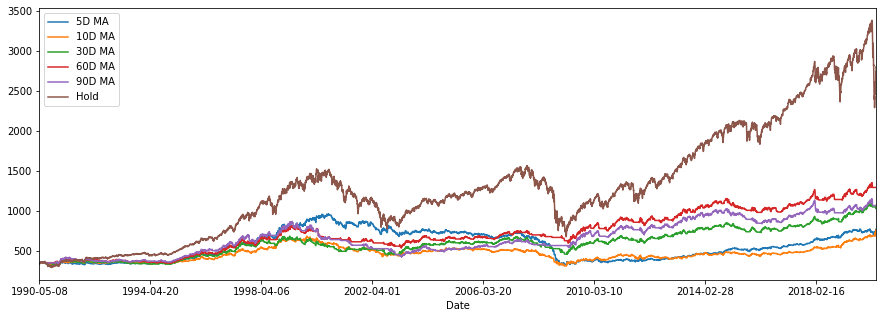

In [116]:
strategies = ["5D MA", "10D MA", "30D MA", "60D MA", "90D MA", "Hold"]

df_portfolios = pd.DataFrame(index=df.index)
fig, ax = plt.subplots()

for strategy in strategies:
    value = 340.523
    value_list = []
    for i in range(len(df)):
        r = df["% Change"][i]
        if df[strategy][i] == "Buy":
            value *= (1+r)
        value_list.append(value)
    df_portfolios[strategy] = value_list

df_portfolios.plot(ax=ax, figsize=(15,5))

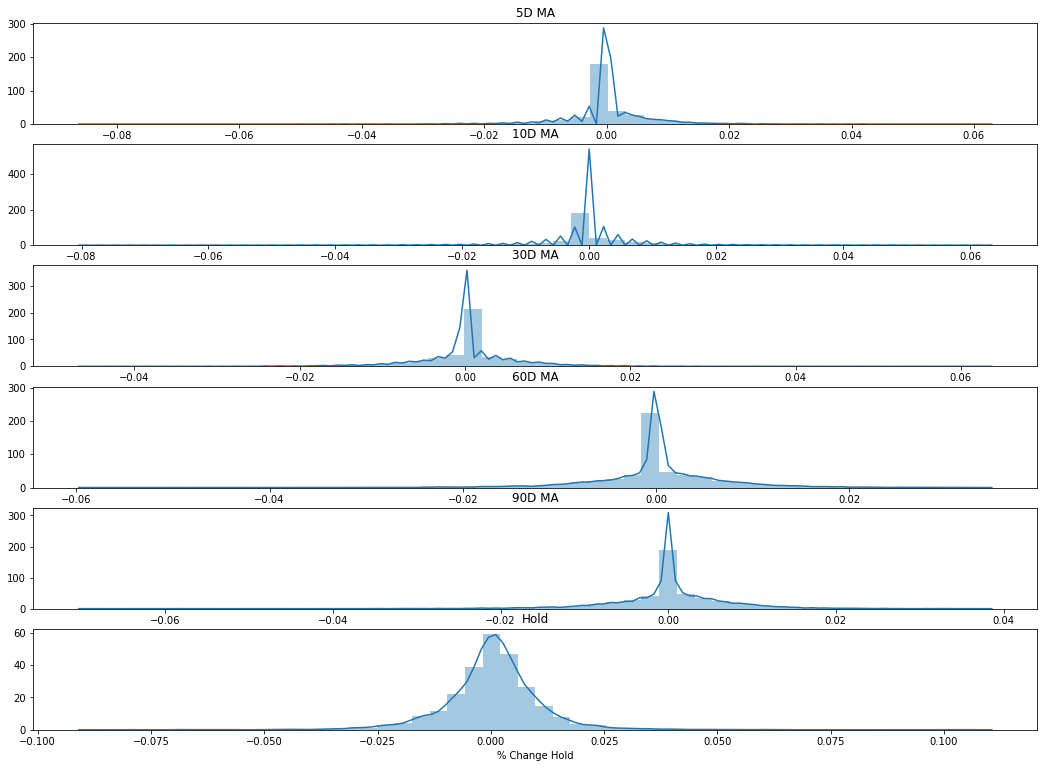

In [117]:
fig, ax = plt.subplots(6,1,figsize = (18,13))
for i in range(len(df_portfolios.columns)):
    col = df_portfolios.columns[i]
    df["% Change " + col] = df_portfolios[col].pct_change().shift(periods=-1, fill_value=0)
    ax[i].set_title(col)
    sns.distplot(df["% Change " + col], ax = ax[i])

In [118]:
print("Return:")
portfolio_return = (df_portfolios.iloc[-1] - df_portfolios.iloc[0])/df_portfolios.iloc[0]
print(portfolio_return)
print()

print("Volatility:")
vol = df_portfolios.std()
print(vol)
print()

print("Sharpe Ratio (Rf = 2.5%)")
print((portfolio_return-1.3075)/vol)

Return:
5D MA     1.270181
10D MA    1.241375
30D MA    2.135987
60D MA    2.784400
90D MA    2.120876
Hold      7.174146
dtype: float64

Volatility:
5D MA     177.542783
10D MA     86.130829
30D MA    169.038128
60D MA    255.268535
90D MA    210.086095
Hold      687.241704
dtype: float64

Sharpe Ratio (Rf = 2.5%)
5D MA    -0.000210
10D MA   -0.000768
30D MA    0.004901
60D MA    0.005786
90D MA    0.003872
Hold      0.008537
dtype: float64


# Splitting by Decade

In [119]:
def report(df):
    strategies = ["5D MA", "10D MA", "30D MA", "60D MA", "90D MA", "Hold"]

    df_portfolios = pd.DataFrame(index=df.index)
    fig, ax = plt.subplots()

    for strategy in strategies:
        value = 340.523
        value_list = []
        for i in range(len(df)):
            r = df["% Change"][i]
            if df[strategy][i] == "Buy":
                value *= (1+r)
            value_list.append(value)
        df_portfolios[strategy] = value_list

    df_portfolios.plot(ax=ax, figsize=(15,5))
    print("Return:")
    portfolio_return = (df_portfolios.iloc[-1] - df_portfolios.iloc[0])/df_portfolios.iloc[0]
    print(portfolio_return)
    print()

    print("Volatility:")
    vol = df_portfolios.std()
    print(vol)
    print()

    print("Sharpe Ratio (Rf = 2.5%)")
    print((portfolio_return-1.3075)/vol)


### 1990 - 2000

Return:
5D MA     1.647261
10D MA    0.976627
30D MA    0.927395
60D MA    1.310618
90D MA    1.411874
Hold      3.295927
dtype: float64

Volatility:
5D MA     167.329350
10D MA     99.096828
30D MA    111.040314
60D MA    139.072975
90D MA    153.113969
Hold      321.138942
dtype: float64

Sharpe Ratio (Rf = 2.5%)
5D MA     0.002030
10D MA   -0.003339
30D MA   -0.003423
60D MA    0.000022
90D MA    0.000682
Hold      0.006192
dtype: float64


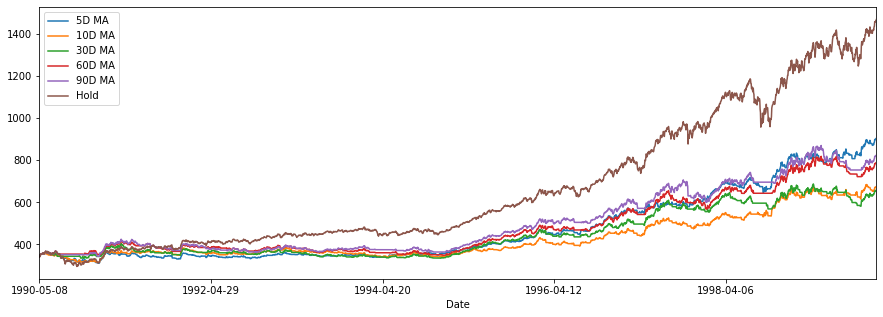

In [120]:
df90s = df[:2440]
report(df90s)

### 2000 - 2010

Return:
5D MA    -0.578762
10D MA   -0.415550
30D MA   -0.083267
60D MA    0.024643
90D MA   -0.104887
Hold     -0.232721
dtype: float64

Volatility:
5D MA     57.095399
10D MA    33.420480
30D MA    27.045341
60D MA    21.409135
90D MA    27.212455
Hold      45.895648
dtype: float64

Sharpe Ratio (Rf = 2.5%)
5D MA    -0.033037
10D MA   -0.051557
30D MA   -0.051424
60D MA   -0.059921
90D MA   -0.051902
Hold     -0.033559
dtype: float64


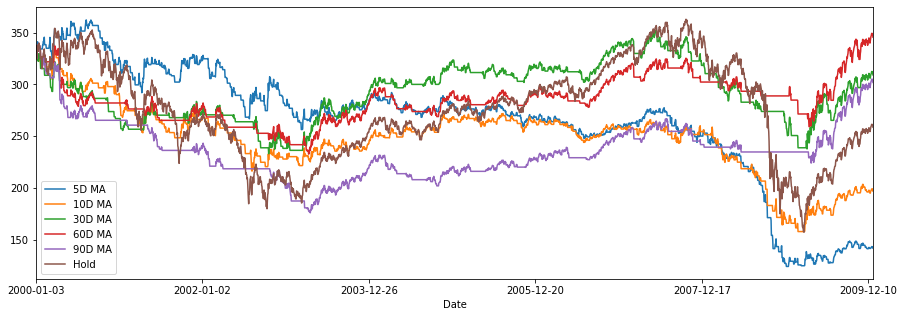

In [121]:
df00s = df[2440:4955]
report(df00s)

### 2010 - 2020

Return:
5D MA     1.050407
10D MA    0.963832
30D MA    0.780481
60D MA    0.650164
90D MA    0.541218
Hold      1.498070
dtype: float64

Volatility:
5D MA     108.350992
10D MA     65.606575
30D MA     64.653353
60D MA     58.000581
90D MA     53.092657
Hold      183.360340
dtype: float64

Sharpe Ratio (Rf = 2.5%)
5D MA    -0.002373
10D MA   -0.005238
30D MA   -0.008151
60D MA   -0.011333
90D MA   -0.014433
Hold      0.001039
dtype: float64


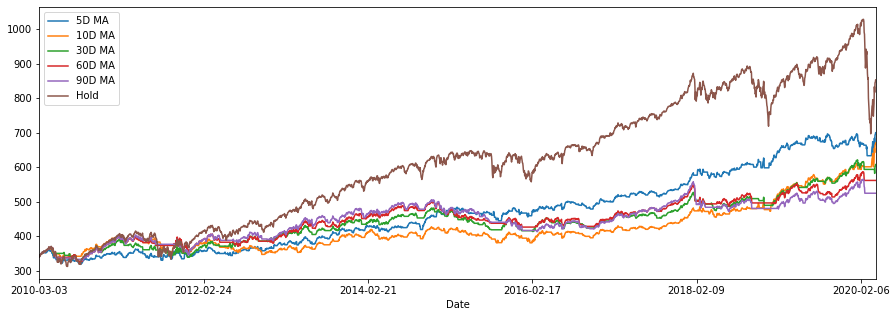

In [122]:
df10s = df[4995:]
report(df10s)

# Splitting by Bullish/Bearish

### April 2000 to December 2002

Return:
5D MA    -0.171272
10D MA   -0.323977
30D MA   -0.293443
60D MA   -0.277157
90D MA   -0.407174
Hold     -0.395404
dtype: float64

Volatility:
5D MA     22.905611
10D MA    28.989427
30D MA    19.917535
60D MA    20.280581
90D MA    30.748582
Hold      46.020195
dtype: float64

Sharpe Ratio (Rf = 2.5%)
5D MA    -0.064559
10D MA   -0.056278
30D MA   -0.080379
60D MA   -0.078137
90D MA   -0.055764
Hold     -0.037003
dtype: float64


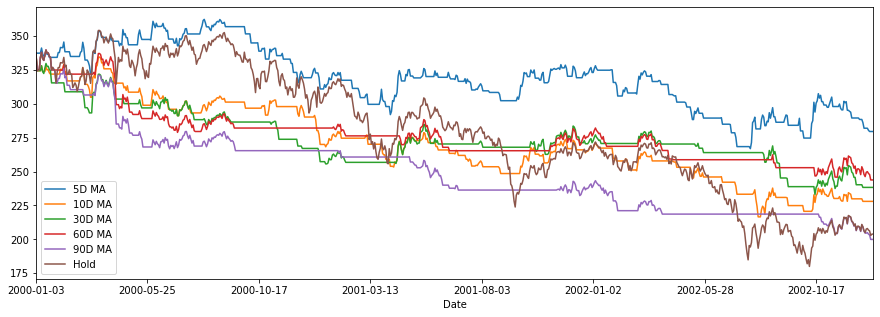

In [124]:
dfdotcom = df[2440:3192]
report(dfdotcom)

### October 2007 to March 2009